In [1]:
%matplotlib
import matplotlib.pyplot as plt
import numpy as np
from nuclass.data import icecat1
from astropy.coordinates import SkyCoord, get_sun
from astropy.time import Time

Using matplotlib backend: module://matplotlib_inline.backend_inline


# Neutrino Data

 We use a catalogue of high-energy neutrinos from IceCuce known as ICECAT1.
The catalogue is described at https://icecube.wisc.edu/data-releases/2023/04/icecat-1-the-icecube-event-catalog-of-alert-tracks/ , and contains neutrinos through to the end of 2023.

You can find the latest list of neutrino alerts on the GCN page https://gcn.gsfc.nasa.gov/amon_icecube_gold_bronze_events.html , and sign up to receive notifications or access via API.

In [2]:
icecat1

,NAME,RUNID,EVENTID,START,EVENTMJD,I3TYPE,RA,DEC,RA_ERR_PLUS,RA_ERR_MINUS,...,ENERGY,FAR,SIGNAL,CASCADE_SCR,SKIMMING_SCR,START_SCR,STOP_SCR,THRGOING_SCR,CR_VETO,OTHER_I3TYPES
0,IC110514A,118178,17334444,2011-05-14 01:32:22.654109,55695.064151,gfu-gold,138.47,-1.94,6.68,3.78,...,187.0,1.30,0.508,3.460000e-07,4.480000e-07,8.110000e-02,4.650000e-05,0.919000,False,NaN
1,IC110610A,118309,46569873,2011-06-10 10:13:33.147086,55722.426078,gfu-gold,272.55,35.64,1.67,2.42,...,294.0,0.25,0.750,3.370000e-10,3.990000e-11,1.200000e-06,1.290000e-04,1.000000,False,gfu-bronze
2,IC110616A,118342,24578488,2011-06-16 17:30:53.939961,55728.729791,gfu-bronze,71.15,5.38,1.41,2.07,...,109.0,4.34,0.257,7.820000e-09,1.320000e-07,5.160000e-05,1.830000e-05,1.000000,False,NaN
3,IC110714A,118435,58198553,2011-07-14 02:42:41.855488,55756.112984,hese-gold,68.20,40.67,0.31,1.10,...,72.0,0.11,0.778,4.330000e-05,1.100000e-05,8.760000e-01,1.810000e-05,0.124000,False,hese-bronze
4,IC110726A,118475,52691508,2011-07-26 12:15:33.258167,55768.510802,gfu-bronze,151.08,6.99,1.19,1.71,...,160.0,1.92,0.396,5.000000e-02,1.390000e-06,9.460000e-01,2.020000e-04,0.003820,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,IC230725A,138193,21103478,2023-07-25 21:30:51.063687,60150.896424,gfu-bronze,327.04,12.33,2.20,2.02,...,145.0,1.68,0.394,2.270000e-07,2.180000e-10,1.000000e+00,3.760000e-09,0.000132,False,NaN
344,IC230727A,138198,44334860,2023-07-27 16:05:39.630288,60152.670598,gfu-bronze,33.66,7.63,1.14,0.70,...,113.0,3.38,0.294,4.880000e-06,9.160000e-10,1.000000e+00,1.080000e-07,0.000053,False,NaN
345,IC230914A,138354,45413430,2023-09-14 05:21:03.717216,60201.222960,gfu-bronze,163.83,31.83,2.55,2.02,...,168.0,0.88,0.544,2.760000e-13,8.770000e-08,3.220000e-08,2.960000e-07,1.000000,False,NaN
346,IC231004A,138415,56188508,2023-10-04 14:39:41.180329,60221.610893,gfu-gold,143.79,25.04,1.05,0.97,...,442.0,0.45,0.842,8.750000e-11,1.440000e-08,1.440000e-04,6.870000e-05,1.000000,False,gfu-bronze


In [3]:
list(x for x in icecat1.columns)

['NAME',
 'RUNID',
 'EVENTID',
 'START',
 'EVENTMJD',
 'I3TYPE',
 'RA',
 'DEC',
 'RA_ERR_PLUS',
 'RA_ERR_MINUS',
 'DEC_ERR_PLUS',
 'DEC_ERR_MINUS',
 'ENERGY',
 'FAR',
 'SIGNAL',
 'CASCADE_SCR',
 'SKIMMING_SCR',
 'START_SCR',
 'STOP_SCR',
 'THRGOING_SCR',
 'CR_VETO',
 'OTHER_I3TYPES']

# Let's explain what some of these fields are...

(**Copied directly from IceCube's documentation**)

For each event, the CSV table contains:
 - RUNID,EVENTID: Unique RunID and EventID combination from IceCube DAQ system
 - START,EVENTMJD: Date/time of event detection
:q
 - I3TYPE: Identification of event selection type (see supporting paper publication for details).  gfu-gold, gfu-bronze, ehe-gold, hese-gold, or hese-bronze types
 - OTHER_I3TYPES: List of other I3TYPE event selection types this event additionally passed.
 - RA,DEC [deg] (and _ERR): Best fit direction in J2000 equatorial coordinates, with asymmetric 90% CL error rectangle boundaries.
 - ENERGY:[TeV] Most probable neutrino energy that would have produced this event.  Calculated assuming an E^(-2.19) astrophysical neutrino power law flux.
 - FAR: [yr^(-1)] Rate of background events expected for alert events at this energy and sky location.
 - SIGNAL: Probability event is of astrophysical origin, calculated assuming an E^(-2.19) astrophysical neutrino power law flux.
 - *_SCR: Probabilities from post-alert convolutional neural network based classifier applied to each event to  better distinguish each events topological signal in the detector
     - THRGOING_SCR: Primary event vertex outside is the detector and a muon-like track is observed passing through the instrumented volume
     - START_SCR: Primary event vertex is inside the instrumented volume and a muon-like track is seen
     - CASCADE_SCR: Primary event vertex is inside the instrumented volume and a shower (non-muon-like track) is observed
     - SKIMMING_SCR: Primary event vertex outside is the detector and little or no energy deposited within instrumented volume
     - STOP_SCR: Primary event vertex outside is the detector and a muon-like track is observed stopping in the instrumented volume
 - CR_VETO [Bool]: Significant in-time cosmic-ray shower activity detected in the surface IceTop array, indicating this event is likely a background event.  
     - Note: at time of alert creation this was not available, and therefore events have been evaluated and tagged after fact rather than removed. 

**An additional note about names**

IceCube neutrinos are named in the same way as GRBs:

    IC + date of detection + alphabetical order key

So the first neutrino detected on 2024 September 01 would be IC240901A, the second would be IC240901B, and so on.

# Understanding the neutrino alert data

IceCube's effective area varies as a function of declination, and azimuth. 

However, because the Earth rotates and IceCube is at the South Pole, azimuthal variations get smoothed out over time. Zenith variations do not. 

**TLDR: the IC effective area does not vary as a function of Right Ascension on the sky, but varies a lot with declination.**

Text(0.5, 0, 'Sin(declination)')

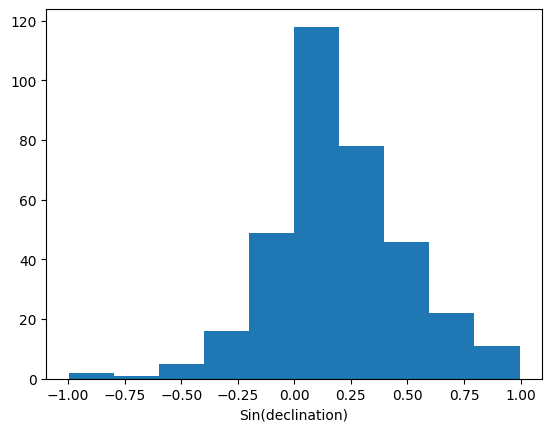

In [4]:
plt.hist(np.sin(np.radians(icecat1["DEC"]))) # Sin(dec) not dec to account for projection effects for a sphere
plt.xlabel("Sin(declination)")

Text(0.5, 0, 'Right Ascension [degrees]')

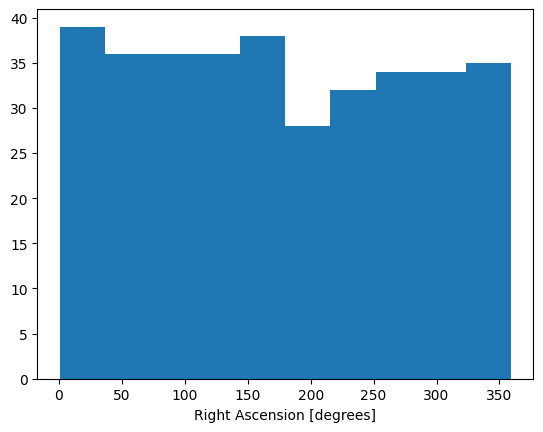

In [5]:
plt.hist(icecat1["RA"])
plt.xlabel("Right Ascension [degrees]")

# Augmenting Neutrino Data

## Localisation Area

In [6]:
# Let's approximate the localisation from IceCube as a rectangle. 
# The full contour is not always Gaussian, and is not released in real time, so often a rectangle is best.

area = (
    (icecat1["RA_ERR_PLUS"] + icecat1["RA_ERR_MINUS"])  # Width in RA
    * (icecat1["DEC_ERR_PLUS"] + icecat1["DEC_ERR_MINUS"]) # Width in Dec
    * abs(np.cos(np.radians(icecat1["DEC"]))) # Approximately account for projection
)
icecat1["AREA"] = area

In [7]:
print(f'Median neutrino area is {icecat1["AREA"].median():.1f} sq. deg, mean is {icecat1["AREA"].mean():.1f}')

Median neutrino area is 7.7 sq. deg, mean is 25.9


([<matplotlib.axis.XTick at 0x1086850d0>,
 [Text(-1.0, 0, '0.1'),
  Text(0.0, 0, '1.0'),
  Text(1.0, 0, '10.0'),
  Text(2.0, 0, '100.0'),
  Text(3.0, 0, '1000.0')])

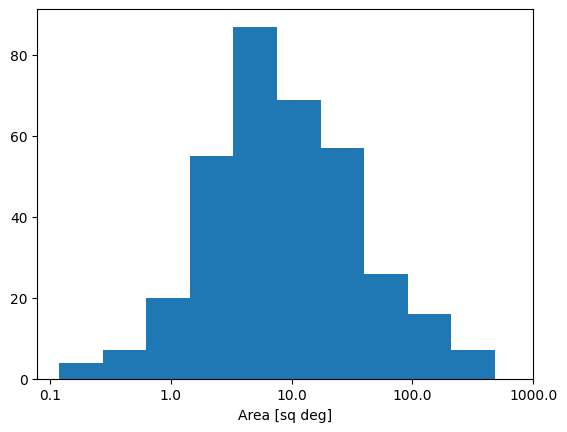

In [8]:
plt.hist(np.log10(icecat1["AREA"]))
plt.xlabel("Area [sq deg]")
x_ticks = np.logspace(-1, 3, 5) # Convert labels from log
plt.xticks(np.log10(x_ticks), x_ticks)

The neutrino localisations vary dramatically. The median is ~8 sq deg, but some have localisations > 100 sq deg. 
This is due to the topology of each event, with some neutrinos being much easier to reconstruct than others. The probability that an object accidentally coincides with a neutrino is much higher for large neutrinos. 

## Galactic Latitude

In [17]:
# Let's use astropy to work out the galactic coordinates of these neutrinos
c = SkyCoord(icecat1["RA"], icecat1["DEC"], unit="deg")

icecat1["GALL"] = c.galactic.l.value
icecat1["GALB"] = c.galactic.b.value

## Distance to Sun (because most telescopes don't work during the day!)

In [18]:
times = Time(icecat1["EVENTMJD"], format="mjd") # Time of each event

sun_positions = get_sun(times) # Position of sun at each time
sun_positions

separation = c.separation(sun_positions).value  # Angle between the sun and each neutrino (approximately, since it depends where you are on Earth!)
icecat1["SUNDIST"] = separation

 55768.5108016  55780.97970435 55791.68864321 55806.09220291
 55811.79461555 55833.26046549 55834.44513647 55846.86687056
 55885.96104032 55885.9733547  55903.71892797 55904.4569016
 55908.39772382 55911.27685053 55913.33542794 55987.80691329
 56043.41532672 56048.5704209  56062.95901934 56070.5742824
 56070.63865189 56076.54294701 56079.30557153 56083.65455899
 56089.36416965 56146.20714664 56186.30530487 56192.54933227
 56211.77094169 56226.59949622 56234.50752072 56246.33035013
 56317.2657123  56317.65900655 56319.27998865 56331.12141218
 56367.73599256 56369.28453777 56390.18877428 56390.75835433
 56391.98239268 56420.64119744 56421.18583123 56431.48285382
 56443.55692495 56470.11039111 56470.42590148 56484.52983356
 56504.07237014 56505.25626841 56508.81461902 56512.33958627
 56526.40856501 56542.79309917 56579.9092108  56588.55850593
 56604.55261167 56608.03124344 56620.1450545  56630.47007245
 56658.40386364 56660.88576485 56665.30789703 56666.5029862
 56671.87788784 56679.14747

In [23]:
# We can make some basic cuts:

mask = (
    (~icecat1["CR_VETO"].astype(bool))  # Is the neutrino alert coincident with a cosmic ray air shower? If so, likely background.
    & (abs(icecat1["GALB"]) > 10.) # Is the neutrino extra-galatic? (EM telescopes can't see through the Milky Way!)
    & (icecat1["SUNDIST"] > 60.) # Is the neutrino far enough from the sun for simultaneous EM coverage?
    & (icecat1["AREA"] < 30.) # Is the neutrino localisation reasonably small?
)

print(f"Selected {mask.sum()} neutrinos out of {len(mask)} total neutrinos")

Selected 153 neutrinos out of 348 total neutrinos


In [12]:
# Cut on distance to sun
# Cut on galactic latitude